## Problem: 363. Max Sum of Rectangle No Larger Than K

https://leetcode.com/problems/max-sum-of-rectangle-no-larger-than-k/description/

Given an m x n matrix matrix and an integer k, return the max sum of a rectangle in the matrix such that its sum is no larger than k.

It is guaranteed that there will be a rectangle with a sum no larger than k.

 

Example 1:
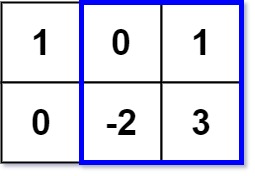

Input: matrix = [[1,0,1],[0,-2,3]], k = 2

Output: 2

Explanation: Because the sum of the blue rectangle [[0, 1], [-2, 3]] is 2, and 2 is the max number no larger than k (k = 2).

Example 2:

Input: matrix = [[2,2,-1]], k = 3

Output: 3
 

Constraints:

m == matrix.length

n == matrix[i].length

1 <= m, n <= 100

-100 <= matrix[i][j] <= 100

-105 <= k <= 105
 

Follow up: What if the number of rows is much larger than the number of columns?

In [18]:
def maxSumSubmatrix(matrix, k):
        maxSum  = float("-inf")
        preSum = preSumOfMatrix(matrix)
        n = len(matrix)
        m = len(matrix[0])
        for row in range(1, n+1):
            for col in range(1, m+1):
                for row2 in range(row, n+1):
                    for col2 in range(col, m+1):
                        currentSum = preSum[row2][col2] - preSum[row-1][col2]-preSum[row2][col-1] + preSum[row-1][col-1]
                        if currentSum <= k:
                            maxSum = max(maxSum, currentSum)
        return maxSum
                

def preSumOfMatrix(matrix):
    n = len(matrix)
    m = len(matrix[0])
    sums = [[0 for _ in range(m+1)] for row in range(n+1)]

    for row in range(1, len(matrix)+1):
        sums[row][1] = sums[row-1][1] + matrix[row-1][0]
    for col in range(1, len(matrix[0])+1):
        sums[1][col] = sums[1][col-1] + matrix[0][col-1]

    for row in range(2, n+1):
        for col in range(2, m+1):
            sums[row][col] = matrix[row-1][col-1] + sums[row-1][col] + sums[row][col-1] - sums[row-1][col-1]
    return sums

In [19]:
matrix = [[1,0,1],[0,-2,3]]
k = 2
maxSumSubmatrix(matrix, k)

2